In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
# from tensorflow import keras
# from keras.utils import np_utils
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter
from keras.layers import Activation, Dense,Dropout

random.seed(46)
print(random.random())

0.8882680764524881


In [ ]:
rom google.colab import files
 uploaded = files.upload()

# To store dataset in a Pandas Dataframe
import io
german_df = pd.read_csv(io.BytesIO(uploaded['german.csv']),header=None)

Categorical columns are encoded with an Axxx format, where “x” are integers for different labels. 
A one-hot encoding of the categorical variables will be required.
The numerical variables have different scales, e.g. 6, 48, and 12 in column 2, and 1169, 5951, etc. in column 5. Scaling of the integer columns will be needed for those algorithms that are sensitive to scale.

In [ ]:
german_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# change the column name

In [ ]:
german_df.columns = ['checking account','Duration','Credit history',
                     'Purpose','Credit amount','Savings account','Present employment since',
                     'Installment rate ', 'sex','Other debtors','Present residence' ,'Property','Age','Other installment plans','Housing','existing credits' ,'Job','dependents','Telephone','Foreign worker','target']

In [ ]:
german_df.head()

,checking account,Duration,Credit history,Purpose,Credit amount,Savings account,Present employment since,Installment rate,sex,Other debtors,Present residence,Property,Age,Other installment plans,Housing,existing credits,Job,dependents,Telephone,Foreign worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
# german_df['Age'].value_counts()

In [ ]:
min(german_df['Age'])

19

In [ ]:

max(german_df['Age'])

75

In [ ]:
# change the parametric values to the existing ones ;in case having better outlook of features

In [ ]:

german_df['checking account'].replace(["A11" , 'A12','A13','A14'], ["< 0 DM", "0 <=  < 200 DM",">= 200 DM", 'no checking account'] , inplace =True)


In [ ]:
german_df['checking account']

0                   < 0 DM
1           0 <=  < 200 DM
2      no checking account
3                   < 0 DM
4                   < 0 DM
              ...         
995    no checking account
996                 < 0 DM
997    no checking account
998                 < 0 DM
999         0 <=  < 200 DM
Name: checking account, Length: 1000, dtype: object

In [ ]:
german_df['Purpose'].replace(["A40" , 'A41','A42','A43' , 'A44', 'A45', 'A46','A47' , 'A48', 'A49', 'A410'],
                             ["car(new)", "car(old)","Furniture" ,  "TV", 'domestic appliances','repairs', 'education', 'vacation','retaining', 'business','others'] , inplace =True)

In [ ]:
# german_df['Purpose']

In [ ]:
german_df['Savings account'].replace(["A61" , 'A62','A63','A64', 'A65'], ["< 100 DM", "100 <= . < 500 DM","500 <= ... < 1000 DM" ,  ">= 1000 DM", 'unknown/ no savings account'] , inplace =True)

In [ ]:
# german_df['Savings account']

In [ ]:
# leave off marital status & just considering gender type

In [ ]:
german_df['sex'].replace(["A91" , 'A92','A93','A94', 'A95'], ["male", "female","male" ,  "male", 'female'] , inplace =True)

In [ ]:
german_df['sex'].value_counts()

male      690
female    310
Name: sex, dtype: int64

In [ ]:

german_df['Property'].replace(["A121" , 'A122','A123','A124'], ["real state", "life insurance","car" , ' no property'] , inplace =True)

In [ ]:
german_df['Housing'].replace(["A151" , 'A152','A153'], ["rent", "own","free"] , inplace =True)

In [ ]:
german_df['Credit history'].replace(["A30" , 'A31','A32','A33', 'A34'], ["no credits taken/ all credits paid back duly", "all credits at this bank paid back duly","existing credits paid back duly till now", ' delay in paying off in the past','critical account/ other credits existing (not at this bank)'] , inplace =True)

In [ ]:
german_df['Job'].replace(["A171" , 'A172','A173','A174'], ["unemployed/ unskilled - non-resident", "unskilled - resident","skilled employee / official" , "management/ self-employed/highly qualified employee/ officer"] , inplace =True)

In [ ]:
german_df['Foreign worker'].replace(["A201" , 'A1202'], ["yes", "no"] , inplace =True)

In [ ]:
german_df['Telephone'].replace(["A191" , 'A192'], ["no", "yes"] , inplace =True)

In [ ]:
german_df['Other installment plans'].replace(['A141',"A142" , 'A143'], ["bank", "stores", 'none'] , inplace =True)

In [ ]:
# drop these two features becuse they some how relates to the job status and garantor 

In [ ]:
credit_df =german_df.drop(['Other debtors','Present employment since'], axis=1)

In [ ]:
credit_df.head()

,checking account,Duration,Credit history,Purpose,Credit amount,Savings account,Installment rate,sex,Present residence,Property,Age,Other installment plans,Housing,existing credits,Job,dependents,Telephone,Foreign worker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,TV,1169,unknown/ no savings account,4,male,4,real state,67,none,own,2,skilled employee / official,1,yes,yes,1
1,0 <= < 200 DM,48,existing credits paid back duly till now,TV,5951,< 100 DM,2,female,2,real state,22,none,own,1,skilled employee / official,1,no,yes,2
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,2,male,3,real state,49,none,own,1,unskilled - resident,2,no,yes,1
3,< 0 DM,42,existing credits paid back duly till now,Furniture,7882,< 100 DM,2,male,4,life insurance,45,none,free,1,skilled employee / official,2,no,yes,1
4,< 0 DM,24,delay in paying off in the past,car(new),4870,< 100 DM,3,male,4,no property,53,none,free,2,skilled employee / official,2,no,yes,2


In [ ]:
credit_df.shape

(1000, 19)

In [ ]:
# summarize the class distribution
target = credit_df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))
 
print('***********************')
print('1= Good Risk')
print('2 = Bad Risk')

Class=1, Count=700, Percentage=70.000%
Class=2, Count=300, Percentage=30.000%
***********************
1= Good Risk
2 = Bad Risk


In [ ]:
credit_df['target']=['Good' if x==1 else 'Bad' for x in credit_df['target']]

In [ ]:
credit_df.head()

,checking account,Duration,Credit history,Purpose,Credit amount,Savings account,Installment rate,sex,Present residence,Property,Age,Other installment plans,Housing,existing credits,Job,dependents,Telephone,Foreign worker,target
0,< 0 DM,6,critical account/ other credits existing (not ...,TV,1169,unknown/ no savings account,4,male,4,real state,67,none,own,2,skilled employee / official,1,yes,yes,Good
1,0 <= < 200 DM,48,existing credits paid back duly till now,TV,5951,< 100 DM,2,female,2,real state,22,none,own,1,skilled employee / official,1,no,yes,Bad
2,no checking account,12,critical account/ other credits existing (not ...,education,2096,< 100 DM,2,male,3,real state,49,none,own,1,unskilled - resident,2,no,yes,Good
3,< 0 DM,42,existing credits paid back duly till now,Furniture,7882,< 100 DM,2,male,4,life insurance,45,none,free,1,skilled employee / official,2,no,yes,Good
4,< 0 DM,24,delay in paying off in the past,car(new),4870,< 100 DM,3,male,4,no property,53,none,free,2,skilled employee / official,2,no,yes,Bad


In [ ]:
credit_df.describe(include=['object'])

,checking account,Credit history,Purpose,Savings account,sex,Property,Other installment plans,Housing,Job,Telephone,Foreign worker,target
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,2,4,3,3,4,2,2,2
top,no checking account,existing credits paid back duly till now,TV,< 100 DM,male,car,none,own,skilled employee / official,no,yes,Good
freq,394,530,280,603,690,332,814,713,630,596,963,700


In [ ]:
# removing datapoint with missing informations
credit_df = credit_df.dropna()

In [ ]:
credit_df.shape

(1000, 19)

In [ ]:
def check_missing(data, output_path=None):
   
    result = pd.concat([data.isnull().sum(), data.isnull().mean()], axis=1)
    result = result.rename(index=str, columns={0: 'total missing', 1: 'proportion'})
    if output_path:
        result.to_csv(f'{output_path}missing.csv')
        print(output_path, 'missing.csv')
    return result

In [ ]:
check_missing(data=credit_df)

,total missing,proportion
checking account,0,0.0
Duration,0,0.0
Credit history,0,0.0
Purpose,0,0.0
Credit amount,0,0.0
Savings account,0,0.0
Installment rate,0,0.0
sex,0,0.0
Present residence,0,0.0
Property,0,0.0


In [ ]:
credit_df= credit_df.fillna('unknown')

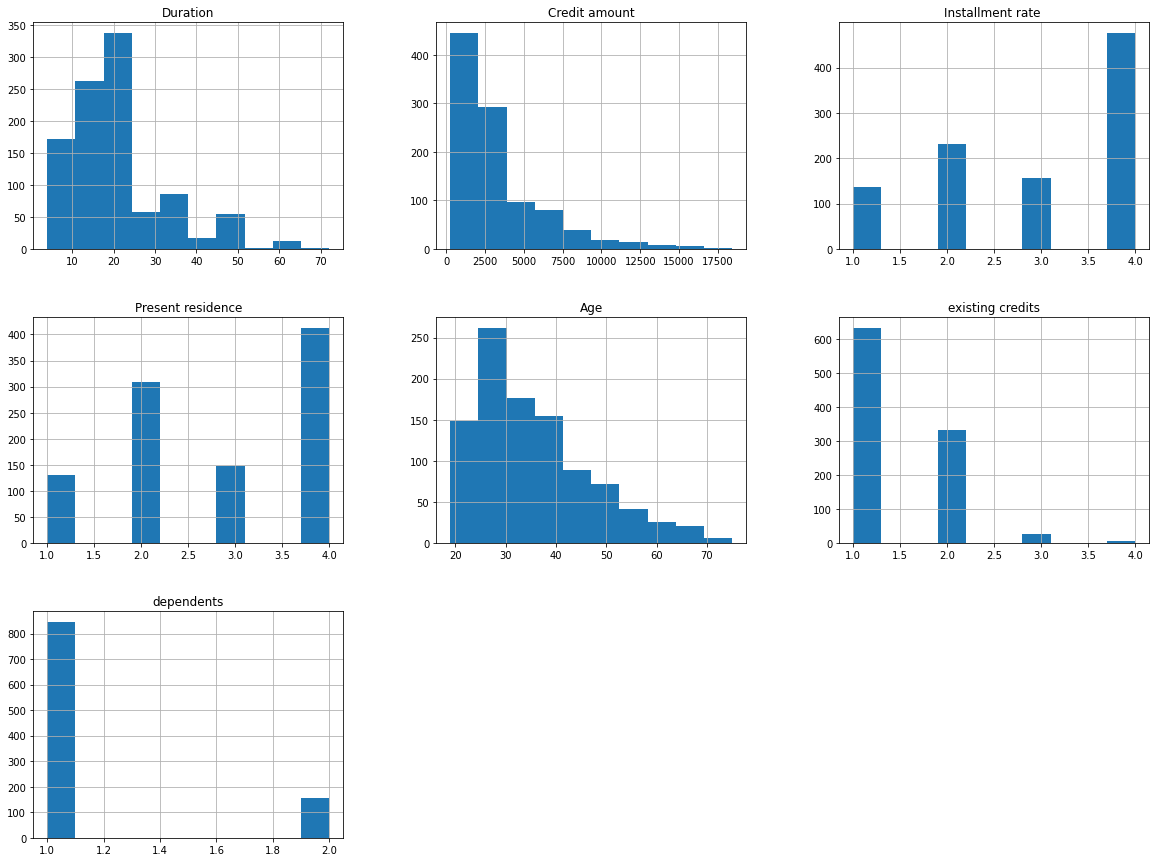

In [ ]:
credit_df.hist(figsize = (20,15));

In [ ]:
categorical = [ 'Housing',  'Purpose','Job','Credit history']

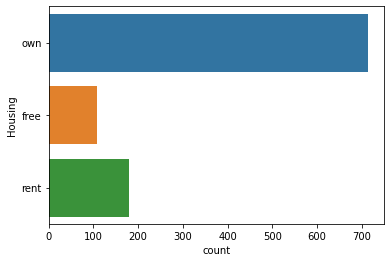

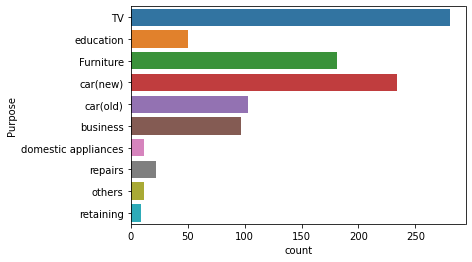

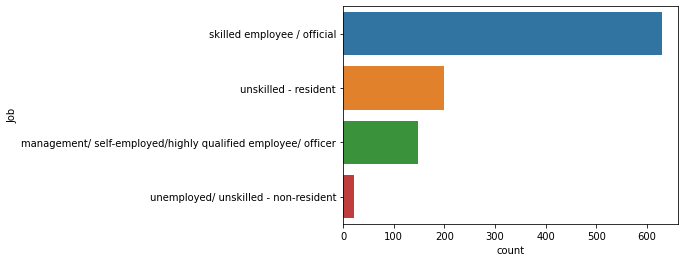

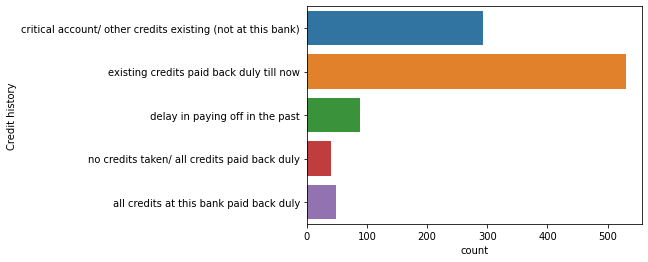

In [ ]:
import seaborn as sns
for col in credit_df[categorical].columns:
    sns.countplot(y =col, data = credit_df)
    plt.show()

In [ ]:
# S_A = credit_df.loc[:,['sex','Age']]
# fig = px.box(S_A, x="sex", y="Age", points="all",color="sex")
# fig.update_layout(
    # title={
          # 'text':"Sex Vs Age Cross tabulation",
        # 'y':.95,
        # 'x':.5,
        # 'xanchor': 'center',
        # 'yanchor': 'top'
    # },
    # xaxis_title="Sex",
    # yaxis_title="Age",
   
# )
# fig.show()

In [ ]:
# Data Engineering

In [ ]:
credit_df['target']=[1 if x=='Good' else 0 for x in credit_df['target']]

In [ ]:
credit_df['target']

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: target, Length: 1000, dtype: int64

In [ ]:
y = credit_df['target']
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: target, Length: 1000, dtype: int64

In [ ]:
#  label encoding
X = credit_df.drop(['target'],axis=1)

In [ ]:
X.shape

(1000, 18)

In [ ]:
X['sex']=[1 if x=='male' else 0 for x in X['sex']]

german_df['sex'].value_counts()


male      690
female    310
Name: sex, dtype: int64

In [ ]:
X['Foreign worker']=[1 if x=='yes' else 0 for x in X['Foreign worker']]
X['Telephone']=[1 if x=='yes' else 0 for x in X['Telephone']]
X['Job'] = [1 if x=='skilled employee / official' else 0 for x in X['Job']]
X['Age']=[1 if x <=25 else 0 for x in X['Age']]
X['Housing'] = [1 if x =='own' else 0 for x in X['Housing'] ]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X.head()

,Duration,Credit amount,Installment rate,sex,Present residence,Age,Housing,existing credits,Job,dependents,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
0,6,1169,4,1,4,0,1,2,1,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,48,5951,2,0,2,1,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
2,12,2096,2,1,3,0,1,1,0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
3,42,7882,2,1,4,0,0,1,1,2,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,24,4870,3,1,4,0,0,2,1,2,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [ ]:
X['sex'].value_counts()

1    690
0    310
Name: sex, dtype: int64

In [ ]:
X.shape

(1000, 43)

In [ ]:
final_cols = ['Credit amount','Duration','Installment rate ', 'Present residence', 'existing credits', 'dependents']+[x for x in X.columns if x not in ['Credit amount','Duration','Installment rate ', 'Present residence', 'existing credits', 'dependents']]

In [ ]:
final_cols

['Credit amount',
 'Duration',
 'Installment rate ',
 'Present residence',
 'existing credits',
 'dependents',
 'sex',
 'Age',
 'Housing',
 'Job',
 'Telephone',
 'Foreign worker',
 'checking account_0 <=  < 200 DM',
 'checking account_< 0 DM',
 'checking account_>= 200 DM',
 'checking account_no checking account',
 'Credit history_ delay in paying off in the past',
 'Credit history_all credits at this bank paid back duly',
 'Credit history_critical account/ other credits existing (not at this bank)',
 'Credit history_existing credits paid back duly till now',
 'Credit history_no credits taken/ all credits paid back duly',
 'Purpose_Furniture',
 'Purpose_TV',
 'Purpose_business',
 'Purpose_car(new)',
 'Purpose_car(old)',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_others',
 'Purpose_repairs',
 'Purpose_retaining',
 'Savings account_100 <= . < 500 DM',
 'Savings account_500 <= ... < 1000 DM',
 'Savings account_< 100 DM',
 'Savings account_>= 1000 DM',
 'Savings accoun

In [ ]:
#numerical variables 
numerical = ['Credit amount', 'Duration', 'Installment rate ', 'Present residence', 
             'existing credits', 'dependents']
standard_transformer = Pipeline(steps=[('standard', StandardScaler())])
scaling = ColumnTransformer(remainder='passthrough', transformers=[('std', standard_transformer , numerical)])

In [ ]:

X = pd.DataFrame(scaling.fit_transform(X))

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,-0.745131,-1.236478,0.918477,1.046987,1.027079,-0.428290,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.949817,2.248194,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.416562,-0.738668,-0.870183,0.140505,-0.704926,2.334869,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.634247,1.750384,-0.870183,1.046987,-0.704926,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.566664,0.256953,0.024147,1.046987,1.027079,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X.columns = final_cols

In [ ]:
X.head()

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
0,-0.745131,-1.236478,0.918477,1.046987,1.027079,-0.428290,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.949817,2.248194,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.416562,-0.738668,-0.870183,0.140505,-0.704926,2.334869,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.634247,1.750384,-0.870183,1.046987,-0.704926,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.566664,0.256953,0.024147,1.046987,1.027079,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:

# train_test_splition,
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
703,-0.272304,0.754763,0.918477,-0.765977,1.027079,-0.42829,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
311,0.793862,0.256953,0.918477,-1.672459,-0.704926,-0.42829,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
722,-0.724219,-0.738668,0.918477,-0.765977,-0.704926,-0.42829,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
629,0.198751,-0.987573,-1.764514,1.046987,-0.704926,-0.42829,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
0,-0.745131,-1.236478,0.918477,1.046987,1.027079,-0.42829,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
X_test.head()

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
521,-0.028801,-0.240857,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
737,0.392986,-0.240857,0.024147,1.046987,-0.704926,2.334869,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
740,-0.335395,0.256953,-0.870183,0.140505,-0.704926,-0.428290,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
660,-0.699763,-0.738668,0.024147,1.046987,-0.704926,-0.428290,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
411,1.411302,1.003669,0.024147,-0.765977,1.027079,-0.428290,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_train.shape

(670, 43)

In [ ]:
X_test.shape

(330, 43)

In [ ]:
# define model
from keras import regularizers

model = Sequential()
model.add(Dense(12, input_dim=45, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
Dropout(0.1)
model.add(Dense(10, activation='relu'))
Dropout(0.1)
model.add(Dense(9, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#  model.summary()

In [ ]:
# define hyperparameter 
EPOCHS = 50
BATCH_SIZE = 10
OPTIMIZER = 'adam'
LOSS = 'binary_crossentropy'

In [ ]:
model.compile(loss=LOSS , optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
history = model.fit(np.array(X_train), np.array(y_train), epochs= EPOCHS, batch_size=BATCH_SIZE, validation_data=(np.array(X_test),np.array(y_test)))

Epoch 1/50
67/67 [==============================] - 1s 4ms/step - loss: 0.7406 - accuracy: 0.4716 - val_loss: 0.6677 - val_accuracy: 0.6636
Epoch 2/50
67/67 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.7015 - val_loss: 0.6279 - val_accuracy: 0.6909
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: 0.6064 - accuracy: 0.7030 - val_loss: 0.6033 - val_accuracy: 0.6909
Epoch 4/50
67/67 [==============================] - 0s 3ms/step - loss: 0.5775 - accuracy: 0.7030 - val_loss: 0.5792 - val_accuracy: 0.7061
Epoch 5/50
67/67 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7179 - val_loss: 0.5553 - val_accuracy: 0.7061
Epoch 6/50
67/67 [==============================] - 0s 3ms/step - loss: 0.5122 - accuracy: 0.7403 - val_loss: 0.5386 - val_accuracy: 0.7424
Epoch 7/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.7433 - val_loss: 0.5276 - val_accuracy: 0.7394
Epoch 8/50
67/67 [==

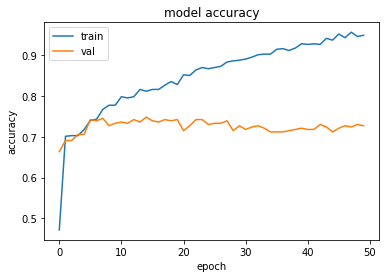

In [ ]:
#Visualization 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# get predictions
results = model.predict(np.array(X_test))
# results

In [ ]:
results_binary = [1 if x >= 0.5 else 0 for x in results]

In [ ]:
good_risk =np.mean(results_binary)

In [ ]:
good_risk

0.7545454545454545

In [ ]:
# Now, that the network is trained, take the test data to get their activation patterns 
# Thus, for each of the network's layers, get the output for all activation functions using the test data
outputs=[]
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    outputs.append(keras_function([np.array(X_test)]))

In [ ]:
# outputs

In [ ]:
layer_outputs = [layer.output for layer in model.layers]

In [ ]:
len(outputs)

5

In [ ]:
all_outputs = [outputs[i][0] for i in range(len(outputs))]

In [ ]:
all_activations = np.concatenate(all_outputs,axis=1)

In [ ]:
all_activations

array([[0.35831475, 0.6171597 , 0.44936287, ..., 0.46795684, 0.874944  ,
        0.92308295],
       [0.70564103, 2.2207656 , 0.81360847, ..., 0.        , 2.4870877 ,
        0.9999482 ],
       [0.10130116, 1.2696326 , 1.2711965 , ..., 0.        , 1.7992865 ,
        0.9991987 ],
       ...,
       [0.04678944, 0.39443806, 1.9344159 , ..., 0.5711304 , 0.8354058 ,
        0.9289178 ],
       [0.5475206 , 1.5810151 , 0.21319403, ..., 3.1452184 , 0.        ,
        0.00351739],
       [0.371265  , 0.6493812 , 0.5708658 , ..., 0.        , 1.2249373 ,
        0.98709095]], dtype=float32)

In [ ]:
all_activations.shape

(330, 39)

In [ ]:
activations_df = pd.DataFrame(all_activations)

In [ ]:
activations_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.358315,0.617160,0.449363,0.403672,0.330660,0.508398,0.162219,0.627836,0.000000,0.002808,0.391660,0.000000,0.000000,0.0,0.000000,0.327855,0.000000,0.000000,0.331868,0.000000,0.345232,0.000000,0.511950,0.111884,0.210440,0.043864,0.363374,0.355655,0.819933,0.254161,0.041614,1.104866,0.893592,0.0,0.239277,0.837877,0.467957,0.874944,0.923083
1,0.705641,2.220766,0.813608,0.000000,0.000000,0.455356,1.770507,1.443464,0.372452,0.000000,1.850519,0.000000,0.000000,0.0,0.000000,2.279987,0.000000,0.607309,0.715195,0.000000,1.024854,0.000000,1.510872,0.000000,1.264790,0.671232,0.133439,0.799835,2.509308,0.715424,0.000000,3.792371,2.224192,0.0,0.750706,3.170068,0.000000,2.487088,0.999948
2,0.101301,1.269633,1.271196,1.331555,0.000000,0.083013,0.868981,0.000000,0.000000,0.000000,2.066179,0.555445,0.000000,0.0,0.000000,1.631947,0.000000,0.038644,0.000000,0.000000,0.718747,0.000000,1.115450,0.000000,0.826593,0.644558,0.056346,0.670967,1.495121,0.472537,0.000000,2.697980,1.675684,0.0,0.607931,2.368437,0.000000,1.799286,0.999199
3,0.638692,0.315661,0.402666,0.000000,0.764916,0.618521,0.682185,0.630772,0.000000,0.743236,0.000000,0.000000,0.000000,0.0,0.502262,0.470251,0.097582,0.507121,0.751981,0.000000,0.088005,0.652193,0.000000,0.000000,0.174402,0.246279,0.030418,1.350144,0.528687,0.277930,0.000000,1.694524,1.441586,0.0,0.014081,1.310745,0.000000,1.532586,0.994920
4,0.089846,0.000000,0.775473,0.084385,0.000000,0.000000,0.512485,0.373819,0.000000,0.919611,0.000000,0.400314,0.088565,0.0,0.272481,0.801554,0.000000,0.322071,0.194521,0.184363,0.000000,0.201290,0.268963,0.000000,0.293818,0.367661,0.000000,0.810677,0.733769,0.360490,0.000000,1.583447,1.085001,0.0,0.218155,1.340831,0.000000,1.242381,0.988976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.000000,0.000000,0.879741,1.165188,0.000000,0.000000,1.146513,0.000000,0.000000,0.592666,1.522338,0.000000,0.000000,0.0,0.000000,1.654917,0.000000,0.000000,0.544051,0.000000,0.000000,0.000000,1.134985,0.000000,0.985555,0.000000,0.000000,1.270965,1.217832,0.826242,0.000000,3.993549,2.843049,0.0,0.074046,2.783796,0.000000,3.118188,0.999989
326,0.022754,0.101324,0.734206,0.808064,0.057911,0.707348,0.771893,0.443662,0.000000,0.000000,1.171907,0.221659,0.000000,0.0,0.000000,0.902902,0.000000,0.000000,0.743218,0.000000,0.505254,0.000000,0.986920,0.050735,0.655270,0.000000,0.245327,0.735321,1.319505,0.570364,0.000000,2.703491,1.914344,0.0,0.169546,1.988370,0.000000,2.045204,0.999506
327,0.046789,0.394438,1.934416,0.000000,0.000000,0.000000,1.068450,0.172599,0.000000,0.519540,0.000000,0.000000,0.000000,0.0,0.000000,0.543911,0.000000,0.770955,0.803248,0.113441,0.000000,0.000000,0.341518,0.000000,0.243194,0.000000,0.275388,0.343511,1.256185,0.308485,0.000000,1.161458,0.764830,0.0,0.054243,0.950426,0.571130,0.835406,0.928918
328,0.547521,1.581015,0.213194,0.153168,1.041031,0.000000,1.133224,0.000000,0.000000,0.375763,0.510967,0.000000,0.000000,0.0,0.000000,0.808330,0.895756,1.255777,0.338437,0.000000,1.068760,0.781541,0.000000,0.054499,0.000000,1.775872,1.737281,0.023554,1.598080,0.000000,0.000000,0.000000,0.000000,0.0,1.732134,0.000000,3.145218,0.000000,0.003517


Use k-means to group Activation Patterns before and after Feature Flip

In [ ]:
# Choose a (binary) protected feature
feature = 'sex'

In [ ]:
X_test2=X_test
X_test2.head()

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
521,-0.028801,-0.240857,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
737,0.392986,-0.240857,0.024147,1.046987,-0.704926,2.334869,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
740,-0.335395,0.256953,-0.870183,0.140505,-0.704926,-0.428290,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
660,-0.699763,-0.738668,0.024147,1.046987,-0.704926,-0.428290,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
411,1.411302,1.003669,0.024147,-0.765977,1.027079,-0.428290,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# flipping the label of new test set
X_test2[feature]=[1 - x for x in X_test[feature]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_test2[feature]

521    1.0
737    0.0
740    0.0
660    0.0
411    0.0
      ... 
506    0.0
342    0.0
485    0.0
711    1.0
133    0.0
Name: sex, Length: 330, dtype: float64

In [ ]:
X_test2.head()

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
521,-0.028801,-0.240857,-0.870183,-0.765977,-0.704926,-0.428290,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
737,0.392986,-0.240857,0.024147,1.046987,-0.704926,2.334869,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
740,-0.335395,0.256953,-0.870183,0.140505,-0.704926,-0.428290,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
660,-0.699763,-0.738668,0.024147,1.046987,-0.704926,-0.428290,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
411,1.411302,1.003669,0.024147,-0.765977,1.027079,-0.428290,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# test list 
test_ls=[X_test,X_test2]

In [ ]:
woman_1 =X_test.loc[X_test['sex'] == 0]

In [ ]:
print(woman_1)

     Credit amount  ...  Other installment plans_stores
737       0.392986  ...                             0.0
740      -0.335395  ...                             0.0
660      -0.699763  ...                             0.0
411       1.411302  ...                             0.0
678      -0.314483  ...                             0.0
..             ...  ...                             ...
628       0.273184  ...                             0.0
506      -0.322989  ...                             0.0
342      -0.020649  ...                             0.0
485      -0.730954  ...                             0.0
133      -0.456260  ...                             0.0

[234 rows x 43 columns]


In [ ]:
man_1 = X_test.loc[X_test['sex'] == 1]

In [ ]:
print(man_1)

     Credit amount  ...  Other installment plans_stores
521      -0.028801  ...                             0.0
636      -0.671762  ...                             0.0
883      -0.770297  ...                             0.0
761      -0.406638  ...                             0.0
319       0.131761  ...                             0.0
..             ...  ...                             ...
707      -0.107133  ...                             0.0
448      -0.654748  ...                             0.0
728       1.114633  ...                             0.0
777       0.084266  ...                             0.0
711      -0.734853  ...                             0.0

[96 rows x 43 columns]


In [ ]:
man_1['sex'].sum()

96.0

In [ ]:
employe_woman_1= woman_1.loc[woman_1['Job']==1]

In [ ]:
employe_woman_1['Job']

740    1.0
660    1.0
626    1.0
513    1.0
859    1.0
      ... 
148    1.0
628    1.0
506    1.0
342    1.0
133    1.0
Name: Job, Length: 152, dtype: float64

In [ ]:
employee_man_1 = man_1.loc[man_1['Job']==1]

In [ ]:
employee_man_1 ['Job']

521    1.0
636    1.0
761    1.0
96     1.0
312    1.0
974    1.0
601    1.0
261    1.0
10     1.0
221    1.0
296    1.0
604    1.0
866    1.0
70     1.0
679    1.0
66     1.0
753    1.0
327    1.0
382    1.0
451    1.0
826    1.0
351    1.0
168    1.0
985    1.0
86     1.0
120    1.0
721    1.0
767    1.0
865    1.0
802    1.0
526    1.0
613    1.0
557    1.0
836    1.0
596    1.0
331    1.0
249    1.0
708    1.0
734    1.0
49     1.0
350    1.0
575    1.0
922    1.0
118    1.0
523    1.0
196    1.0
359    1.0
362    1.0
468    1.0
155    1.0
482    1.0
576    1.0
934    1.0
707    1.0
728    1.0
777    1.0
711    1.0
Name: Job, dtype: float64

In [ ]:
woman_2 =X_test2.loc[X_test2['sex'] == 1]
employe_woman_2= woman_2.loc[woman_2['Job']==1]

man_2 = X_test2.loc[X_test2['sex'] == 0]
employee_man_2 = man_2.loc[man_2['Job']==1]

In [ ]:

def counterfactual_examples4bias(model, test_ls, k=4):
    i=1
    
    result_ls = []
    credit_result_ls = []

    for test_data in test_ls:

        # Predict loan acceptance rate for test data
        results = model.predict(np.array(test_data))
        results_binary = [1 if x >= 0.5 else 0 for x in results]

        # get activation values for test data
        outputs=[]
        for layer in model.layers:
            keras_function = K.function([model.input], [layer.output])
            outputs.append(keras_function([np.array(test_data)]))

        all_outputs = [outputs[i][0] for i in range(len(outputs))]
        all_activations = np.concatenate(all_outputs,axis=1)
        
        
        # reduce dimension by tSNE
        activations_embedded1 = TSNE(n_components=2,perplexity=50,method='exact').fit_transform(all_activations)
#         print(activations_embedded1)
        activations_embedded_df1 = pd.DataFrame(activations_embedded1)
        # print(activations_embedded_df1)
        activations_embedded_df1.columns=['x','y']

        # cluster low-dimensional activations by k-means
        kmeans = KMeans(n_clusters=k, random_state=0).fit(activations_embedded_df1)

        X_test.columns=final_cols
        # print(X_test.index)
        credit_test = credit_df.iloc[X_test.index]
        
        credit_test['Job'] = [1 if x=='skilled employee / official' else 0 for x in credit_test['Job']]
       

        # print(credit_test['Job'])

        credit_test['cluster']=kmeans.labels_
        credit_test['predicted'] = results_binary


        # compute metrics for groups
        group_ls=[]
        all_size = credit_test.shape[0]
        all_credit_amount = np.mean(credit_test['Credit amount'])
        all_credit_mean = np.mean(credit_test['existing credits'])
        all_credit_duration = np.mean(credit_test['Duration'])
        all_good_risk = np.mean(credit_test['predicted'])

        print('+++++++++++++++++++++++++++++++++++++++++++ Test Data: ',i)
        print('Number of Applicants: ', all_size)
        print('Average existance credit: ', all_credit_mean)
        print('Average credit: ', all_credit_amount)
        print('Average credit Duration: ', all_credit_duration)
        print('Average good risk score: ', all_good_risk)

        for cluster in range(k):
            group = credit_test[credit_test['cluster']==cluster]
            # print(group)
            size = group.shape[0]

            group['sex'] = [1 if x=='male' else 0 for x in group['sex']]

            
          
            n_men = group['sex'].sum() 
         
            men_1 = group.loc[group['sex'] == 1]
            # print(men_1)
            n_employee_men_1 = (men_1.loc[men_1['Job']==1])
            n_employee_men = n_employee_men_1['Job'].sum()
            # print(n_employee_men)
            n_women = size-n_men
            women_1 =  group.loc[group['sex'] == 0]
            n_employee_women_1 =  (women_1.loc[women_1['Job']==1])
            n_employee_women =  n_employee_women_1['Job'].sum()


             
            
                # n_women_2 = group['sex'].sum()
                # num_women= n_women_2 
                # women_2 =  group.loc[group['sex'] == 1]
                # n_employee_women_2 =  (women_2.loc[women_2['Job']==1])
                # n_employee_women =  n_employee_women_2['Job'].sum()
            
                # n_men = size-n_women
                # men_2 =  group.loc[group['sex'] == 0]
                # n_employee_men_2 = (men_2.loc[men_2['Job']==1])
                # n_employee_men = n_employee_men_2['Job'].sum()
               
               
            
          

            # credit_mean = np.mean(group['existing credits'])
            credit_amount = np.mean(group['Credit amount'])
            duration_month = np.mean(group['Duration'])
            good_rate = np.mean(group['predicted'])

            print('*****************************')
            print('Group: ',cluster)
            print('Group Size: ', size)
            print('Percentage of Men: ', n_men/size)
            print('Percentage of Women:  ', n_women/size)
            print('Percentage of Employee_men: ' , n_employee_men/size)
            print('Percentage of Employee_women: ' , n_employee_women/size)
            # print('Average existance credit: ', credit_mean)
            print('Average credit amount: ',  credit_amount)
            print('Average Duration:', duration_month)
            print('Good Rate: ', good_rate)

            group_features=[size,n_men/size,n_women/size,n_employee_men/size, n_employee_women/size,credit_amount,duration_month, good_rate]

            group_ls.append(group_features)

        group_df = pd.DataFrame(group_ls)
        group_df.columns=['size','n_men','n_women', 'n_employee_men','n_employee_women','credit_amount',' duration_month','good_rate']
            
        result_ls.append(group_df)
        credit_result_ls.append(credit_test)

        
        i=i+1
        
    return result_ls, credit_result_ls

In [ ]:
results_ls, credit_result_ls = counterfactual_examples4bias(model,test_ls)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

+++++++++++++++++++++++++++++++++++++++++++ Test Data:  1
Number of Applicants:  330
Average existance credit:  1.3848484848484848
Average credit:  2950.6878787878786
Average credit Duration:  20.215151515151515
Average good risk score:  0.7545454545454545
*****************************
Group:  0
Group Size:  96
Percentage of Men:  0.6979166666666666
Percentage of Women:   0.3020833333333333
Percentage of Employee_men:  0.5520833333333334
Percentage of Employee_women:  0.19791666666666666
Average credit amount:  2824.0104166666665
Average Duration: 18.0625
Good Rate:  1.0
*****************************
Group:  1
Group Size:  94
Percentage of Men:  0.7127659574468085
Percentage of Women:   0.2872340425531915
Percentage of Employee_men:  0.4574468085106383
Percentage of Employee_women:  0.19148936170212766
Average credit amount:  3426.031914893617
Average Duration: 24.98936170212766
Good Rate:  0.1702127659574468
*****************************
Group:  2
Group Size:  86
Percentage of Men:  0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
def plot_conterfactual_examples4bias(results_ls, credit_result_ls,k ):
    l=1
    
    fig = make_subplots(rows=1, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}]], subplot_titles=("Original", "Flipped"), print_grid=False)
    for data in results_ls:
        
        hover_text = []
        bubble_size = []
        
        # create hover text by taking relevant information from the aggregated group values
        for index, row in data.iterrows():
            hover_text.append(('Size: {size}<br>'+ 
                              'Amount of Men: {n_men}<br>'+
                              'Amount of Woman : {n_women}<br>'+
                              'Amount of Employee Men: {n_employee_men}<br>'+
                              'Amount of Employee Women: {n_employee_women}<br>'+
                              'Average Loan Amount: {average_amount}<br>'+
                              'Average Duration: {duration_month}<br>'
                              'Average Good Risk: {good_rate}').format(i=index, size=row['size'],
                                                    n_men=row['n_men'],
                                                    n_women=row['n_women'],
                                                    n_employee_men = row['n_employee_men'],
                                                    n_employee_women= row['n_employee_women'],
                                                    average_amount=row['credit_amount'],
                                                    duration_month= row[' duration_month'],
                                                    good_rate=row['good_rate']))
            bubble_size.append(row['size'])

        data['text'] = hover_text
        data['size'] = bubble_size
        sizeref = 2.*max(data['size'])/(1000**2)
        
       
        # var colors = ['#a6cee3', '#b2df8a', '#fb9a99', '#fdbf6f',
                  # '#cab2d6', '#ffff99', '#1f78b4', '#33a02c'];
        # define colors
        color1 = px.colors.qualitative.Dark24[0:k]
        color2 = px.colors.qualitative.Light24[0:k]
       



        # Create figure traces
        if l==1:
            check=False
            name='Original'
            fig.add_trace(go.Scatter(x=data.index, y=data['good_rate'],name=name, text=data['text'],marker_size=data['size']/sum(data['size']),
                                     marker=dict(sizemode='area', sizeref=sizeref, line_width=2, color=data.index, colorscale=color1)),secondary_y=check,row=1, col=l)

        elif l==2:
            check=True
            name='Flipped'
            fig.add_trace(go.Scatter(x=data.index, y=data['good_rate'],name=name, text=data['text'],marker_size=data['size']/sum(data['size']),
                                     marker=dict(sizemode='area', sizeref=sizeref, line_width=2, color=data.index, colorscale=color2)),secondary_y=check,row=1, col=l)

            
    
        
       
        fig.update_traces(mode='markers', marker=dict(sizemode='area', sizeref=sizeref, line_width=2))

        
        l=l+1
        
    # modify plot layout 
    fig.update_xaxes(row=1, col=1, showgrid=False,showticklabels=True, tickmode = 'array',tickvals = list(range(k)))
    fig.update_xaxes(row=1, col=2, showgrid=False,showticklabels=True,  tickmode = 'array',tickvals = list(range(k)))
    fig.update_yaxes(row=1, col=1, title='Average Group Good Risk')
    fig.update_yaxes(row=1, col=2, title='Average Group Good Risk')
    fig.update_layout(showlegend=False, title={'text': "Counterfactual Examples for Bias Detection",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}) 
    
    
    # add sankey
    source_dest_df=pd.DataFrame({'source':credit_result_ls[0]['cluster'], 'target':credit_result_ls[1]['cluster']})
    sankey_df = source_dest_df.groupby(['source','target']).size().to_frame('value')
    sankey_df.reset_index(inplace=True) 
    sankey_df['Link Color'] =  ['rgba(128, 212, 255, 1)','rgba(128, 212, 255, 1)','rgba(255,192,203,1)','rgba(255,192,203,1)','rgba(226, 255, 189, 1)','rgba(226, 255, 189, 1)', 'rgba(226, 255, 189, 1)',
                           'rgba(255, 87, 87, 1)', 'rgba(255, 87, 87, 1)' ,'rgba(255, 87, 87, 1)', 'rgba(255, 87, 87, 1)']
    opacity = 0.4
    print(sankey_df)
    sankey_df['target']=[x+k for x in sankey_df['target']]
    fig2 = go.Figure(go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = ['Original_'+str(i) for i in range(k)]+['Flipped_'+str(i) for i in range(k)],
            color=color1+color2
        ),
        
        
        link = dict(
          source = sankey_df['source'], 
          target = sankey_df['target'],
          value = sankey_df['value'],
          
              color = sankey_df['Link Color'])))



    fig.show()
    fig2.show()

In [ ]:
plot_conterfactual_examples4bias(results_ls, credit_result_ls,4)

    source  target  value              Link Color
0        0       1     64  rgba(128, 212, 255, 1)
1        0       3     32  rgba(128, 212, 255, 1)
2        1       0     91     rgba(255,192,203,1)
3        1       2      3     rgba(255,192,203,1)
4        2       0      7  rgba(226, 255, 189, 1)
5        2       2     66  rgba(226, 255, 189, 1)
6        2       3     13  rgba(226, 255, 189, 1)
7        3       0      1    rgba(255, 87, 87, 1)
8        3       1     18    rgba(255, 87, 87, 1)
9        3       2     18    rgba(255, 87, 87, 1)
10       3       3     17    rgba(255, 87, 87, 1)


We expect the unbiased model to produce the same output after flipping the gender in dataset. Here we notice that after flipping one feature (gender) in test-dataset the outcome groups differ a bit from the original one.

Original :
The pink group is about  a group of men with percentage amount of 71%  , which more than half of them do have a permanent job and income and group of women with the percentage amunt of 20% which more that 70% of them do have permanent job and income, ask for a large and long-duration loans.

 The blue group is belong to the group of women which all of them have income and permanent job and ask for lorg loan with long duration.

The blue and green group is the average Loan amount begongs to the men which the half of them have permanent job and income and group of women which more than half of them have permanent job and income  and they ask for average loan with short duration


Flipped :
The green group : Network here believes the same applicant are similar to the Red original group after flipping the gender.

The blue and red group indicated large-loans for high income women , the network believes there are more applicant similar to the green and pink group.

In [ ]:
# Taking new feature into account : Age ; Age of customers influence the probability of credit'S beig good!
#  Here the young ages are considered in the interval of (10-25 )
#  Applying Encoding for the two group of peole ; 1) Young ,2) Adult

In [ ]:
X_1 = X

In [ ]:
X_1

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
0,-0.745131,-1.236478,0.918477,1.046987,1.027079,-0.428290,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.949817,2.248194,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.416562,-0.738668,-0.870183,0.140505,-0.704926,2.334869,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.634247,1.750384,-0.870183,1.046987,-0.704926,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.566664,0.256953,0.024147,1.046987,1.027079,2.334869,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.544162,-0.738668,0.024147,1.046987,-0.704926,-0.428290,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
996,0.207612,0.754763,0.918477,1.046987,-0.704926,-0.428290,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
997,-0.874503,-0.738668,0.918477,1.046987,-0.704926,-0.428290,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,-0.505528,1.999289,0.918477,1.046987,-0.704926,-0.428290,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# define the label
y_1 = y
y_1

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: target, Length: 1000, dtype: int64

In [ ]:
# train_test_splition,
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.33, random_state=42)


In [ ]:
X_1_train.shape

(670, 43)

In [ ]:
# define model
from keras.layers import Dropout
from keras import regularizers
# define model
from keras import regularizers

model = Sequential()
model.add(Dense(12, input_dim=45, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
Dropout(0.1)
model.add(Dense(10, activation='relu'))
Dropout(0.1)
model.add(Dense(9, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=LOSS , optimizer=OPTIMIZER, metrics=['accuracy'])

In [ ]:
history = model.fit(np.array(X_1_train), np.array(y_1_train), epochs= EPOCHS, batch_size=BATCH_SIZE, validation_data=(np.array(X_1_test),np.array(y_1_test)))

Epoch 1/50
67/67 [==============================] - 1s 4ms/step - loss: 0.6499 - accuracy: 0.6552 - val_loss: 0.6117 - val_accuracy: 0.6939
Epoch 2/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5874 - accuracy: 0.7030 - val_loss: 0.5804 - val_accuracy: 0.6939
Epoch 3/50
67/67 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7030 - val_loss: 0.5575 - val_accuracy: 0.7000
Epoch 4/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5304 - accuracy: 0.7224 - val_loss: 0.5334 - val_accuracy: 0.7212
Epoch 5/50
67/67 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.7478 - val_loss: 0.5136 - val_accuracy: 0.7273
Epoch 6/50
67/67 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7552 - val_loss: 0.5069 - val_accuracy: 0.7515
Epoch 7/50
67/67 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.7746 - val_loss: 0.5034 - val_accuracy: 0.7182
Epoch 8/50
67/67 [==

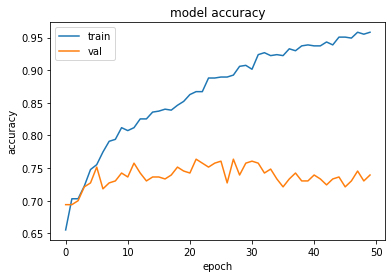

In [ ]:
#Visualization 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Now, that the network is trained, take the test data to get their activation patterns 
# Thus, for each of the network's layers, get the output for all activation functions using the test data
outputs_new=[]
for layer in model.layers:
    keras_function = K.function([model.input], [layer.output])
    outputs_new.append(keras_function([np.array(X_1_test)]))

In [ ]:
layer_outputs_new = [layer.output for layer in model.layers]

In [ ]:
all_outputs_new = [outputs_new[i][0] for i in range(len(outputs_new))]

In [ ]:
all_activations_new = np.concatenate(all_outputs_new,axis=1)

In [ ]:
activations_df_new = pd.DataFrame(all_activations_new)

In [ ]:
activations_df_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
0,0.000000,0.000000,1.298338,0.000000,0.633050,0.000000,0.182679,0.000000,0.567178,1.287826,0.993316,0.000000,0.550818,0.692504,0.235322,0.000000,0.448789,0.000000,0.000000,1.451938,1.183866,0.000000,1.871584,0.977567,0.474955,0.243143,0.000000,0.000000,1.737167,0.350178,1.231497,0.0,0.608350,2.919220,0.000000,1.031370,1.184806,0.677798,0.754888
1,0.464954,0.000000,0.000000,1.064115,1.317911,0.000000,0.485116,0.752156,0.627869,0.004200,0.263659,0.000000,1.428970,0.000000,0.000000,0.000000,1.241929,0.474278,0.000000,0.726148,0.330859,0.931998,0.176064,0.396125,0.146480,1.001836,0.123488,0.157853,1.378936,0.000000,0.000000,0.0,0.585949,0.000000,1.850388,1.200135,0.098667,2.078720,0.000958
2,0.000000,0.102952,0.000000,0.000000,0.000000,0.548368,1.267588,0.566581,1.347936,0.132933,0.000000,0.000000,1.704423,0.000000,0.517347,0.000000,0.000000,0.944910,0.242121,0.464534,0.803868,0.538115,0.927535,1.141182,1.201188,0.766773,1.196493,0.860066,0.433313,0.000000,0.366443,0.0,0.985933,0.715660,0.930895,0.387313,0.659155,0.679954,0.080266
3,0.000000,0.000000,1.252407,0.000000,1.187698,0.000000,0.080353,0.007334,0.281363,0.689188,0.163945,0.000000,0.546417,0.588584,0.012123,0.005265,0.838526,0.000000,0.000000,0.972881,1.623497,0.000000,1.410493,0.727135,0.329991,0.000000,0.000000,0.000000,1.862148,0.994429,1.092724,0.0,1.262427,1.737341,0.000000,1.542482,0.802720,1.012914,0.143750
4,0.423320,0.000000,0.000000,0.000000,1.136954,1.177246,0.000000,0.751002,0.000000,0.458848,1.569987,0.595051,1.462674,0.000000,0.000000,0.000000,0.000000,0.056747,0.000000,1.182840,2.019119,0.000000,2.194338,1.616261,1.775839,0.000000,0.000000,0.000000,0.860592,0.051710,1.710353,0.0,0.000000,4.941998,0.000000,0.000000,2.473619,0.000000,0.997841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,0.372170,0.000000,0.000000,0.000000,0.197349,1.055593,1.086934,0.677333,0.042317,0.000000,0.678617,0.000000,1.890083,0.000000,0.083854,0.000000,0.000000,0.916261,0.000000,0.138136,1.575810,0.000000,1.290971,1.337731,1.700348,0.000000,0.819758,1.095727,0.339852,0.000000,0.733647,0.0,0.516987,2.207561,0.000000,0.000000,1.671191,0.000000,0.924735
326,0.000000,0.000000,2.139933,0.000000,0.492313,0.000000,0.000000,0.000000,0.733847,0.567765,0.489659,0.000000,0.543805,1.031011,1.017864,0.698262,1.096915,0.000000,0.128405,1.068359,1.545224,0.000000,2.422160,1.398608,0.704455,0.000000,0.000000,0.000000,1.701197,0.250679,1.300613,0.0,0.290609,3.976229,0.000000,0.628997,1.924492,0.018067,0.983729
327,0.000000,0.251178,1.030923,0.153798,0.589998,0.000000,0.969659,0.000000,0.762890,0.000000,0.000000,0.000000,1.321261,0.617996,0.755265,0.236830,0.931440,0.209550,0.138040,0.436938,1.093915,0.000000,1.728708,0.812948,0.812438,0.000000,0.403349,0.000000,0.847672,0.000000,0.802695,0.0,0.085709,2.757489,0.000000,0.091207,1.234874,0.000000,0.962592
328,0.000000,0.000000,0.595420,0.081840,0.394412,0.000000,0.139724,0.000000,1.392172,0.000000,0.000000,0.000000,0.820136,0.976650,0.644531,0.403431,0.891937,0.251849,0.412022,0.830450,0.304405,0.353855,0.957662,0.346535,0.000000,0.773882,0.597990,0.000000,1.653539,0.004701,0.009536,0.0,0.673241,0.343355,1.624580,1.177408,0.039868,2.193196,0.001431


In [ ]:
# Choose a (binary) protected feature
label_1 = 'Age'


In [ ]:
X_2_test=X_1_test
X_2_test

,Credit amount,Duration,Installment rate,Present residence,existing credits,dependents,sex,Age,Housing,Job,Telephone,Foreign worker,checking account_0 <= < 200 DM,checking account_< 0 DM,checking account_>= 200 DM,checking account_no checking account,Credit history_ delay in paying off in the past,Credit history_all credits at this bank paid back duly,Credit history_critical account/ other credits existing (not at this bank),Credit history_existing credits paid back duly till now,Credit history_no credits taken/ all credits paid back duly,Purpose_Furniture,Purpose_TV,Purpose_business,Purpose_car(new),Purpose_car(old),Purpose_domestic appliances,Purpose_education,Purpose_others,Purpose_repairs,Purpose_retaining,Savings account_100 <= . < 500 DM,Savings account_500 <= ... < 1000 DM,Savings account_< 100 DM,Savings account_>= 1000 DM,Savings account_unknown/ no savings account,Property_ no property,Property_car,Property_life insurance,Property_real state,Other installment plans_bank,Other installment plans_none,Other installment plans_stores
521,-0.028801,-0.240857,-0.870183,-0.765977,-0.704926,-0.428290,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
737,0.392986,-0.240857,0.024147,1.046987,-0.704926,2.334869,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
740,-0.335395,0.256953,-0.870183,0.140505,-0.704926,-0.428290,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
660,-0.699763,-0.738668,0.024147,1.046987,-0.704926,-0.428290,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
411,1.411302,1.003669,0.024147,-0.765977,1.027079,-0.428290,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,-0.322989,-0.489762,-0.870183,-0.765977,-0.704926,-0.428290,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
342,-0.020649,-0.240857,-1.764514,0.140505,-0.704926,-0.428290,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
485,-0.730954,-1.236478,0.918477,1.046987,-0.704926,-0.428290,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
711,-0.734853,-1.236478,0.918477,1.046987,-0.704926,-0.428290,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# flipping the label of new test set
X_2_test[label_1]=[1 - x for x in X_2_test[label_1]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_2_test[label_1]

521    0.0
737    1.0
740    1.0
660    0.0
411    1.0
      ... 
506    1.0
342    0.0
485    1.0
711    1.0
133    1.0
Name: Age, Length: 330, dtype: float64

In [ ]:
X_2_test[label_1].value_counts()

1.0    261
0.0     69
Name: Age, dtype: int64

In [ ]:
(X_2_test[label_1]== 0).sum()

69

In [ ]:
test_ls_new=[X_1_test,X_2_test]

In [ ]:

def counterfactual_examples4bias(model, test_ls, k=4):
    i=1
    
    result_ls = []
    credit_result_ls = []

    for test_data in test_ls:

        # Predict loan acceptance rate for test data
        results = model.predict(np.array(test_data))
        results_binary = [1 if x >= 0.5 else 0 for x in results]

        # get activation values for test data
        outputs=[]
        for layer in model.layers:
            keras_function = K.function([model.input], [layer.output])
            outputs.append(keras_function([np.array(test_data)]))

        all_outputs = [outputs[i][0] for i in range(len(outputs))]
        all_activations = np.concatenate(all_outputs,axis=1)
        
        
        # reduce dimension by tSNE
        activations_embedded1 = TSNE(n_components=2,perplexity=50,method='exact').fit_transform(all_activations)
#         print(activations_embedded1)
        activations_embedded_df1 = pd.DataFrame(activations_embedded1)
        print(activations_embedded_df1)
        activations_embedded_df1.columns=['x','y']

        # cluster low-dimensional activations by k-means
        kmeans = KMeans(n_clusters=k, random_state=0).fit(activations_embedded_df1)

        X_2_test.columns=final_cols
        # print(X_test.index)
        credit_test = credit_df.iloc[X_2_test.index]
        credit_test['cluster']=kmeans.labels_
        credit_test['predicted'] = results_binary


        # compute metrics for groups
        group_ls=[]
        all_size = credit_test.shape[0]
        all_credit_amount = np.mean(credit_test['Credit amount'])
        all_credit_mean = np.mean(credit_test['existing credits'])
        all_credit_duration = np.mean(credit_test['Duration'])
        all_good_risk = np.mean(credit_test['predicted'])

        print('+++++++++++++++++++++++++++++++++++++++++++ Test Data: ',i)
        print('Number of Customer: ', all_size)
        print('Average existance credit: ', all_credit_mean)
        print('Average credit: ', all_credit_amount)
        print('Average credit Duration: ', all_credit_duration)
        print('Average good risk score: ', all_good_risk)

        for cluster in range(k):
            group = credit_test[credit_test['cluster']==cluster]
            # print(group)
            size = group.shape[0]
            
            if i ==1:
                n_young = (group['Age']==1).sum()
                print(n_young)
            else:   
                n_young = (group['Age']==0).sum()
                print(n_young)
            
            
            n_adult = size-n_young

            credit_mean = np.mean(group['existing credits'])
            credit_amount = np.mean(group['Credit amount'])

            good_rate = np.mean(group['predicted'])

            print('*****************************')
            print('Group: ',cluster)
            print('Group Size: ', size)
            print('Percentage of Young: ', n_young/size)
            print('Percentage of Adult:  ', n_adult/size)
            print('Average existance credit: ', credit_mean)
            print('Average credit amount: ',  credit_amount)
            print('Good Rate: ', good_rate)

            group_features=[size,n_young/size,n_adult/size,credit_mean,credit_amount, good_rate]

            group_ls.append(group_features)

        group_df = pd.DataFrame(group_ls)
        group_df.columns=['size','n_young','n_adult','credit_mean','credit_amount','good_rate']
            
        result_ls.append(group_df)
        credit_result_ls.append(credit_test)

        
        i=i+1
        
    return result_ls, credit_result_ls

In [ ]:
results_ls, credit_result_ls = counterfactual_examples4bias(model,test_ls_new)

             0          1
0   -10.313116   3.414445
1     5.308165 -11.064809
2     3.590893   0.314899
3   -10.002513   2.472364
4    -6.568382   6.353261
..         ...        ...
325   3.438685   1.812879
326 -12.394704   4.168869
327  -1.531404   1.266604
328   6.825065 -11.349720
329   2.897018  -5.069994

[330 rows x 2 columns]
+++++++++++++++++++++++++++++++++++++++++++ Test Data:  1
Number of Customer:  330
Average existance credit:  1.3848484848484848
Average credit:  2950.6878787878786
Average credit Duration:  20.215151515151515
Average good risk score:  0.6818181818181818
0
*****************************
Group:  0
Group Size:  72
Percentage of Young:  0.0
Percentage of Adult:   1.0
Average existance credit:  1.4583333333333333
Average credit amount:  2980.2638888888887
Good Rate:  0.9444444444444444
0
*****************************
Group:  1
Group Size:  84
Percentage of Young:  0.0
Percentage of Adult:   1.0
Average existance credit:  1.2261904761904763
Average credit amount

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



            0          1
0    1.897566   9.515782
1   -5.943922 -10.200266
2    4.606378  -4.372501
3    1.166230   8.288081
4    7.556851   6.430725
..        ...        ...
325  5.207918  -5.012146
326  1.863436  11.716129
327  1.567383   0.112196
328 -8.426354  -9.346573
329 -6.714481  -2.485214

[330 rows x 2 columns]
+++++++++++++++++++++++++++++++++++++++++++ Test Data:  2
Number of Customer:  330
Average existance credit:  1.3848484848484848
Average credit:  2950.6878787878786
Average credit Duration:  20.215151515151515
Average good risk score:  0.6818181818181818
0
*****************************
Group:  0
Group Size:  75
Percentage of Young:  0.0
Percentage of Adult:   1.0
Average existance credit:  1.2266666666666666
Average credit amount:  3783.64
Good Rate:  0.013333333333333334
0
*****************************
Group:  1
Group Size:  82
Percentage of Young:  0.0
Percentage of Adult:   1.0
Average existance credit:  1.353658536585366
Average credit amount:  2556.231707317073
G

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def plot_conterfactual_examples4bias(results_ls, credit_result_ls,k ):
    l=1
    
    fig = make_subplots(rows=1, cols=2, specs=[[{"secondary_y": True}, {"secondary_y": True}]], subplot_titles=("Original", "Flipped"), print_grid=False)
    for data in results_ls:
        
        hover_text = []
        bubble_size = []
        
        # create hover text by taking relevant information from the aggregated group values
        for index, row in data.iterrows():
            hover_text.append(('Size: {size}<br>'+ 
                              'Amount of Young: {n_young}<br>'+
                              'Average Credit: {average_credit}<br>'+
                              'Average Amount: {average_amount}<br>'+
                              'Average Good Risk: {good_rate}').format(i=index, size=row['size'],
                                                    n_young=row['n_young'],
                                                    average_credit=row['credit_mean'],
                                                    average_amount=row['credit_amount'],
                                                    good_rate=row['good_rate']))
            bubble_size.append(row['size'])

        data['text'] = hover_text
        data['size'] = bubble_size
        sizeref = 2.*max(data['size'])/(1000**2)
        
        # define colors
        color1 = px.colors.qualitative.Dark24[0:k]
        color2 =px.colors.qualitative.Light24[0:k]

        # Create figure traces
        if l==1:
            check=False
            name='Original'
            fig.add_trace(go.Scatter(x=data.index, y=data['good_rate'],name=name, text=data['text'],marker_size=data['size']/sum(data['size']),
                                     marker=dict(sizemode='area', sizeref=sizeref, line_width=2, color=data.index, colorscale=color1)),secondary_y=check,row=1, col=l)

        elif l==2:
            check=True
            name='Flipped'
            fig.add_trace(go.Scatter(x=data.index, y=data['good_rate'],name=name, text=data['text'],marker_size=data['size']/sum(data['size']),
                                     marker=dict(sizemode='area', sizeref=sizeref, line_width=2, color=data.index, colorscale=color2)),secondary_y=check,row=1, col=l)

            
    
        
       
        fig.update_traces(mode='markers', marker=dict(sizemode='area', sizeref=sizeref, line_width=2))

        
        l=l+1
        
    # modify plot layout 
    fig.update_xaxes(row=1, col=1, showgrid=False,showticklabels=True, tickmode = 'array',tickvals = list(range(k)))
    fig.update_xaxes(row=1, col=2, showgrid=False,showticklabels=True,  tickmode = 'array',tickvals = list(range(k)))
    fig.update_yaxes(row=1, col=1, title='Average Group Good Risk')
    fig.update_yaxes(row=1, col=2, title='Average Group Good Risk')
    fig.update_layout(showlegend=False, title={'text': "Counterfactual Examples for Bias Detection",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'}) 
    
    
    # add sankey
    source_dest_df=pd.DataFrame({'source':credit_result_ls[0]['cluster'], 'target':credit_result_ls[1]['cluster']})
    print(source_dest_df)
    sankey_df = source_dest_df.groupby(['source','target']).size().to_frame('value')
    print(sankey_df)
    sankey_df['Link Color'] =  ['rgba(128, 212, 255, 1)','rgba(128, 212, 255, 1)','rgba(128, 212, 255, 1)','rgba(255,192,203,1)',
                               'rgba(255,192,203,1)','rgba(226, 255, 189, 1)',  'rgba(255, 87, 87, 1)', 'rgba(255, 87, 87, 1)','rgba(255, 87, 87, 1)']
    # print(sankey_df)
    sankey_df.reset_index(inplace=True) 

    
    # sankey_df.insert(3, "Link Color", rgba(253, 227, 212, 0.5), rgba(242, 116, 32, 1), rgba(253, 227, 212, 0.5), rgba(219, 233, 246, 0.5), True)
  
    print(sankey_df)
  
    
    sankey_df['target']=[x+k for x in sankey_df['target']]
   
    fig2 = go.Figure(go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = ['Original_'+str(i) for i in range(k)]+['Flipped_'+str(i) for i in range(k)],
            color=color1+color2
        ),
        
        
        link = dict(
          source = sankey_df['source'], 
          target = sankey_df['target'],
          value = sankey_df['value'],
             color = sankey_df['Link Color']
          )))



    fig.show()
    fig2.show()

In [ ]:
plot_conterfactual_examples4bias(results_ls, credit_result_ls,4)

     source  target
521       2       3
737       1       0
740       3       2
660       2       3
411       2       3
..      ...     ...
506       3       2
342       2       3
485       0       1
711       1       0
133       3       0

[330 rows x 2 columns]
               value
source target       
0      1          58
       2           1
       3          13
1      0          66
       2          18
2      3          89
3      0           9
       1          24
       2          52
   source  target  value              Link Color
0       0       1     58  rgba(128, 212, 255, 1)
1       0       2      1  rgba(128, 212, 255, 1)
2       0       3     13  rgba(128, 212, 255, 1)
3       1       0     66     rgba(255,192,203,1)
4       1       2     18     rgba(255,192,203,1)
5       2       3     89  rgba(226, 255, 189, 1)
6       3       0      9    rgba(255, 87, 87, 1)
7       3       1     24    rgba(255, 87, 87, 1)
8       3       2     52    rgba(255, 87, 87, 1)


In [ ]:
# Taking new feature into account : Job Status ; It is supposed that job status would influence the probability of being high risk customer!
#  Here the skilled/employee is labeled as 1 and other group as 0
